# PyTorch Fundamentals

## Topics Coverd:

1. Tensors and Basic Operations
   - Creating Tensors
   - Basic Mathematical Operations
   - Element-wise operations
   - Matrix operations
2. Tensor Attributes and Methods
   - Tensor properties (shape, dtype, device)
   - Tensor manipulation (reshape, transpose)
   - Indexing and slicing
   - Type conversion
3. Autograd Basics
   - Computational graphs
   - Automatic differentiation
   - Computing gradients
   - Basic optimization example

In [1]:
import torch
import numpy as np

print(f"PyTorch version: {torch.__version__}")
print(f"Using device: {torch.device('cuda' if torch.cuda.is_available() else 'cpu')}")



PyTorch version: 2.2.2
Using device: cpu


## What is a Tensor?

A tensor is the fundamental object in PyTorch, serving as the basic data structure for all operations. You can think of tensors as n-dimensional arrays that can represent various types of data:

- A 0-dimensional tensor (scalar) represents a single number
- A 1-dimensional tensor (vector) represents a list of numbers
- A 2-dimensional tensor (matrix) represents a table of numbers
- A 3-dimensional tensor could represent a cube of numbers
- And so on for higher dimensions...

What makes tensors special compared to regular arrays is that they can:
1. Keep track of the operations performed on them (for automatic differentiation)
2. Be used efficiently for mathematical operations
3. Work seamlessly with deep learning operations

Let's explore how to create and work with tensors.

## Scalar Tensor

In [2]:
# Scalar tensor
scalar_tensor = torch.tensor(7)

In [3]:
scalar_tensor.shape, scalar_tensor.dim(), scalar_tensor.dtype, scalar_tensor.device

(torch.Size([]), 0, torch.int64, device(type='cpu'))

## Vector Tensor

In [4]:
vector_tensor = torch.tensor([1, 2, 3])

In [5]:
vector_tensor.shape, vector_tensor.dim(), vector_tensor.dtype, vector_tensor.device

(torch.Size([3]), 1, torch.int64, device(type='cpu'))

## 2D Tensor (Matrix)

In [6]:
matrix_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

In [7]:
matrix_tensor.shape, matrix_tensor.dim(), matrix_tensor.dtype, matrix_tensor.device

(torch.Size([2, 3]), 2, torch.int64, device(type='cpu'))

## Here are some operations that can be done with these objects

In [8]:
## Basic operations we can do with these objects

matrix_tensor + 3

tensor([[4, 5, 6],
        [7, 8, 9]])

In [9]:
scalar_tensor + 3

tensor(10)

In [10]:
# element-wise multiplication
vector_tensor * vector_tensor

tensor([1, 4, 9])

In [11]:
# dot product
vector_tensor @ vector_tensor



tensor(14)

In [12]:
vector_tensor * 7 == vector_tensor * torch.tensor(7)

tensor([True, True, True])

In [13]:
# matrix multiplication
matrix_tensor.T @ matrix_tensor

tensor([[17, 22, 27],
        [22, 29, 36],
        [27, 36, 45]])

## Broadcasting: The Radio Analogy

Think of broadcasting like a radio station: one transmitter (let's say playing a song) can reach multiple receivers. The station doesn't need to send individual signals to each receiver - it "broadcasts" one signal that all can receive.

In PyTorch, broadcasting works similarly: a smaller tensor can be automatically "broadcast" to work with a larger tensor without actually creating copies in memory.

### Simple Example:
```python
# Adding a single number (scalar) to a vector
scalar = torch.tensor(2)         # Like our radio station
vector = torch.tensor([1, 2, 3]) # Like multiple receivers

# Broadcasting lets us do this:
result = scalar + vector  # 2 is "broadcast" to [2, 2, 2]
print(f"scalar: {scalar}")
print(f"vector: {vector}")
print(f"result: {result}")  # Will print: tensor([3, 4, 5])
```

```markdown
PyTorch automatically "broadcasts" the scalar `2` to match the vector's shape, as if it were `[2, 2, 2]`, but without actually creating that temporary tensor in memory. That's why it's called broadcasting - one value is automatically spread (broadcast) to match the other tensor's shape.

In [14]:
# Vector + Matrix
vector = torch.tensor([1, 2, 3])
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])

result = vector + matrix
print(result)

tensor([[2, 4, 6],
        [5, 7, 9]])


In [15]:
matrix.T + vector[0:2] == vector[0:2] + matrix.T

tensor([[True, True],
        [True, True],
        [True, True]])

In [16]:
# Broadcasting in 3D
tensor_3d = torch.tensor([[[1, 2, 3],
                          [4, 5, 6]],
                         [[7, 8, 9],
                          [10, 11, 12]]])


In [17]:
tensor_3d.shape

torch.Size([2, 2, 3])

In [18]:
# broadcasting in 3D, pytorch will extend the missing dimension
tensor_3d + torch.tensor([[1, 1, 1], [1, 1, 1]])

# Let's compare right to left:
# tensor_3d:        [2, 2, 3]
# added tensor:       [2, 3]
#                         ^  ^
#                         |  |
#                    The last two dimensions match (2=2 and 3=3)

tensor([[[ 2,  3,  4],
         [ 5,  6,  7]],

        [[ 8,  9, 10],
         [11, 12, 13]]])

The key for broadcasting is:
Start checking from the rightmost dimension
Work your way left
At each position, dimensions must either match, be 1, or not exist

# Tensor Attributes and Methods

In [19]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float16)

In [20]:
x.shape

torch.Size([3, 3])

In [21]:
# dimension is the number of indices needed to select an element
x.dim()

2

In [22]:
# number of elements in the tensor
x.numel()

9

In [23]:
# device is the device where the tensor is stored
x.device

device(type='cpu')

In [24]:
# are elements contiguous in memory?
x.is_contiguous()

True

## Gradient-Related Attributes

In [25]:
# does tensor track gradient?
x.requires_grad


False

In [26]:
# create a tensor that requires gradient
x = torch.tensor(2, requires_grad=True, dtype=torch.float32)

In [27]:
# here is a function of a scalar input

y = x*x - 25

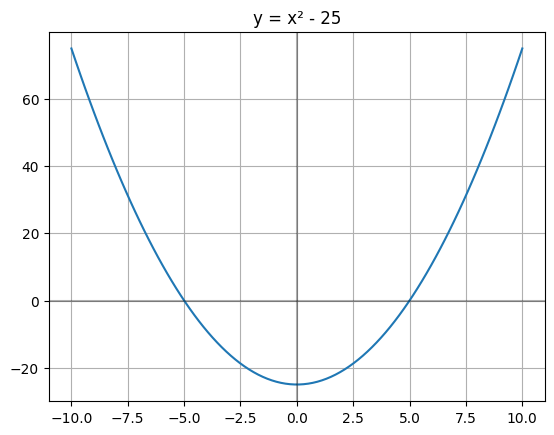

In [28]:
# visualizating what the function looks like

import matplotlib.pyplot as plt
import torch

x = torch.linspace(-10, 10, 100)
y = x * x - 25


plt.plot(x, y)
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('y = x² - 25')
plt.show()

In [29]:
# "backpropagate" the function to find the minimum
# this is equivalent to the gradient descent algorithm

x = torch.tensor([10.0], requires_grad=True)
lr = 0.2

for i in range(10):
    y = x * x - 25
    print(f"x: {x.item():7.4f}, y: {y.item():7.4f}")

    y.backward()
    with torch.no_grad():
        x -= lr * x.grad
        x.grad.zero_()

x: 10.0000, y: 75.0000
x:  6.0000, y: 11.0000
x:  3.6000, y: -12.0400
x:  2.1600, y: -20.3344
x:  1.2960, y: -23.3204
x:  0.7776, y: -24.3953
x:  0.4666, y: -24.7823
x:  0.2799, y: -24.9216
x:  0.1680, y: -24.9718
x:  0.1008, y: -24.9898


In [30]:
# comparing the gradient descent to the analytical solution

x = torch.tensor([10.0], requires_grad=True)
lr = 0.2
eps = 1e-7  # Small value for numerical gradient

for i in range(5):
    y = x * x - 25

    # Compute numerical gradient: (f(x+h) - f(x-h))/(2h)
    x_val = x.item()  # Get current x value
    y_plus = (x_val + eps) ** 2 - 25
    y_minus = (x_val - eps) ** 2 - 25
    numerical_grad = (y_plus - y_minus)/(2*eps)

    # Get PyTorch gradient
    y.backward()
    pytorch_grad = x.grad.clone()  # Save before zeroing

    # Analytical gradient is 2x
    analytical_grad = 2 * x.item()

    print(f"gradients -> analytical: {analytical_grad:7.4f}, "
          f"pytorch: {pytorch_grad.item():7.4f}, "
          f"numerical: {numerical_grad:7.4f}\n")

    with torch.no_grad():
        x -= lr * x.grad
        x.grad.zero_()

gradients -> analytical: 20.0000, pytorch: 20.0000, numerical: 20.0000

gradients -> analytical: 12.0000, pytorch: 12.0000, numerical: 12.0000

gradients -> analytical:  7.2000, pytorch:  7.2000, numerical:  7.2000

gradients -> analytical:  4.3200, pytorch:  4.3200, numerical:  4.3200

gradients -> analytical:  2.5920, pytorch:  2.5920, numerical:  2.5920



Key insights:
1. Even though we compute the gradient of y (∂y/∂x), the gradient gets stored in x.grad
2. This might seem counterintuitive at first - in calculus, we think of the gradient as a property of the function y(x)
3. However, this design makes perfect sense for optimization:
   - We need the gradient to update x (gradient descent: x = x - lr * grad)
   - x might be used to compute many different y's
   - In neural networks, x would be weights/parameters that we're optimizing

This is what "backpropagation" really means:
- Forward pass: x → y (compute output)
- Backward pass: y → x (gradient flows back to input)
- The gradient information "propagates backward" through the computation graph
- Each variable that requires gradients (requires_grad=True) will collect its gradient during this backward flow

This design is particularly elegant for deep learning where:
- We have many parameters (x's) that need updating
- We have one loss function (y)
- We need to compute ∂y/∂x for each parameter x
- The gradients naturally flow back to where they're needed for updates

## Reshaping Methods

In [31]:
x = torch.tensor([1, 2, 3, 4, 5, 6])

In [32]:
x.shape

torch.Size([6])

In [33]:
x.reshape(6,1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [34]:
x.reshape(1,6)

tensor([[1, 2, 3, 4, 5, 6]])

In [35]:
x.reshape(2,3)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [36]:
x.reshape(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## Index and Slicing

In [37]:
# Create a tensor to demonstrate indexing and slicing
x = torch.tensor([
    [[1, 2, 3],
     [4, 5, 6]],
    [[7, 8, 9],
     [10, 11, 12]]
])

In [38]:
x.shape

torch.Size([2, 2, 3])

In [39]:
# basic indexing
x[1, 1, 2]

# first index leads to choosing the [7,8,9], [10,11,12]
# second index leads to choosing [10, 11, 12]
# last index leads to choosing 12

tensor(12)

In [40]:
# slicing
x[0:2, 0:2, 2]

tensor([[ 3,  6],
        [ 9, 12]])

## Type Conversion

In [41]:
x = torch.tensor(4)

In [42]:
x.dtype

torch.int64

In [43]:
x.to(torch.float32).dtype

torch.float32

# Autograd basics

In [70]:
# 1. Computational Graphs and Gradient Tracking
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

In [75]:
# create a computation
z = x + y
w = z + x
f = w ** 2

# f is a function of w, which is a function of z (and x), which is a function of x and y

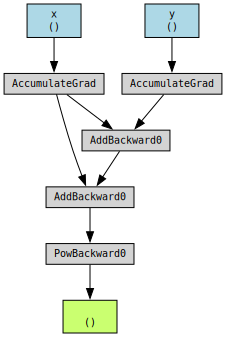

In [76]:
from torchviz import make_dot

# Visualize the computation graph
make_dot(f, params={"x": x, "y": y})

The visualization shows our computation as a directed graph. Here's what each part means:

### 1. Input Nodes (Bottom of graph)
- You see `x` and `y` connected to `AccumulateGrad` nodes
- These are our input tensors where we set `requires_grad=True`
- `AccumulateGrad` means "this is where gradients will be stored during backpropagation"

### 2. Operation Nodes (Middle and Top)
- The `add` nodes represent our additions (`z = x + y` and `w = z + x`)
- The `pow` node at the top represents our squaring operation (`f = w ** 2`)
- We don't see the variable names `z`, `w`, or `f` because these are intermediate results
- PyTorch shows us the operations (add, pow) instead of the variable names

### 3. Edges (Arrows)
- Arrows show how data flows through the computation
- Following from bottom to top:
    * First `add`: combines `x` and `y` to create `z`
    * Second `add`: combines the result (`z`) with `x` again to create `w`
    * `pow`: takes `w` and squares it to create `f`

Think of it like a recipe:
```python
Ingredients (inputs):   x, y
Step 1 (first add):    z = x + y
Step 2 (second add):   w = z + x
Step 3 (pow):          f = w²
```

The graph shows the same steps, just with PyTorch's internal operation names rather than our variable names.

In [77]:
# forward pass
z = x + y
w = z + x        # = 2x + y
f = w ** 2

# Backward pass
f.backward()


In [81]:
# Gradient descent step
learning_rate = 0.01

with torch.no_grad():  # We don't want to track gradients during the update
    x -= learning_rate * x.grad
    y -= learning_rate * y.grad

    # Zero gradients for next step
    x.grad.zero_()
    y.grad.zero_()

# Check new values
z = x + y
w = z + x
f = w ** 2

print("\nAfter one step of gradient descent:")
print(f"x = {x.item():.4f}")
print(f"y = {y.item():.4f}")
print(f"f(x,y) = {f.item():.4f}")


After one step of gradient descent:
x = 1.7200
y = 2.8600
f(x,y) = 39.6900


In [88]:
# Starting values
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Learning rate (how big of a step we take)
learning_rate = 0.1

# Forward pass
z = x + y
w = z + x        # = 2x + y
f = w ** 2

print("Before gradient descent:")
print(f"x = {x.item():.4f}")
print(f"y = {y.item():.4f}")
print(f"f(x,y) = {f.item():.4f}")

# Backward pass
f.backward()

# Print gradients
print("\nGradients:")
print(f"df/dx = {x.grad.item():.4f}")
print(f"df/dy = {y.grad.item():.4f}")

# Gradient descent step
with torch.no_grad():  # We don't want to track gradients during the update
    x -= learning_rate * x.grad
    y -= learning_rate * y.grad
    
    # Zero gradients for next step
    x.grad.zero_()
    y.grad.zero_()

# Check new values
z = x + y
w = z + x
f = w ** 2

print("\nAfter one step of gradient descent:")
print(f"x = {x.item():.4f}")
print(f"y = {y.item():.4f}")
print(f"f(x,y) = {f.item():.4f}")

Before gradient descent:
x = 2.0000
y = 3.0000
f(x,y) = 49.0000

Gradients:
df/dx = 28.0000
df/dy = 14.0000

After one step of gradient descent:
x = -0.8000
y = 1.6000
f(x,y) = 0.0000



Optimization path:
Step 0: x = 2.0000, y = 3.0000, f(x,y) = 49.0000
Step 1: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 2: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 3: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 4: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 5: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 6: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 7: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 8: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 9: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 10: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 11: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 12: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 13: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 14: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 15: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 16: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 17: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 18: x = -0.8000, y = 1.6000, f(x,y) = 0.0000
Step 19: x = -0.8000, y = 1.6000, f(x,y)

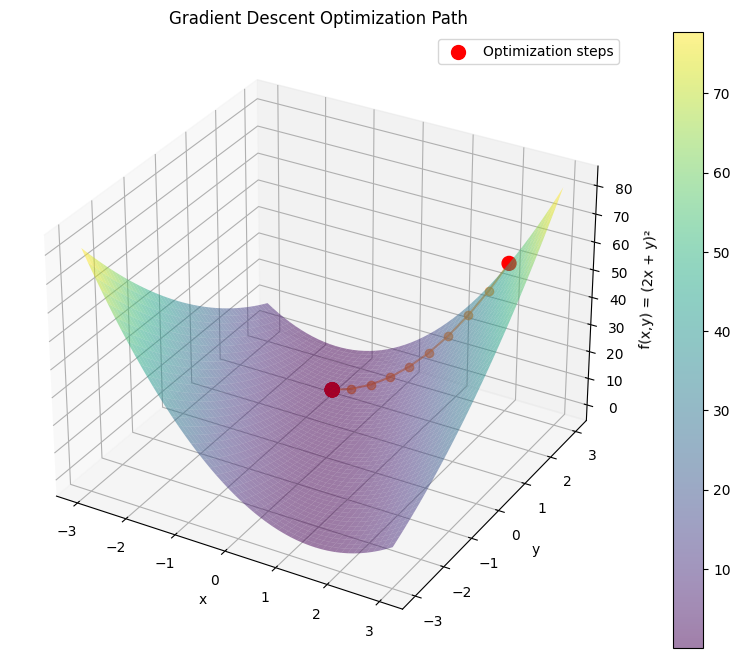

In [96]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Setup for optimization
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
learning_rate = 0.1
n_steps = 20

# Store history of points
path_x = []
path_y = []
path_z = []

# Create surface data for plotting
grid_size = 50
x_range = np.linspace(-3, 3, grid_size)
y_range = np.linspace(-3, 3, grid_size)
X, Y = np.meshgrid(x_range, y_range)
Z = (2*X + Y)**2  # Our function f(x,y) = (2x + y)²

# Optimization loop
for step in range(n_steps):
    # Store current point
    current_x = x.item()
    current_y = y.item()
    current_z = (2*current_x + current_y)**2
    
    path_x.append(current_x)
    path_y.append(current_y)
    path_z.append(current_z)
    
    # Forward pass
    z = x + y
    w = z + x        # = 2x + y
    f = w ** 2
    
    # Backward pass
    f.backward()
    
    # Gradient descent step
    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
        x.grad.zero_()
        y.grad.zero_()

# Add final point
path_x.append(x.item())
path_y.append(y.item())
path_z.append((2*x.item() + y.item())**2)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surface = ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')

# Plot points on the surface
ax.scatter(path_x, path_y, path_z, c='red', s=100, label='Optimization steps')

# Connect points with lines that follow the surface
for i in range(len(path_x)-1):
    # Create intermediate points between consecutive steps
    interp_points = 10
    xs = np.linspace(path_x[i], path_x[i+1], interp_points)
    ys = np.linspace(path_y[i], path_y[i+1], interp_points)
    zs = (2*xs + ys)**2  # Calculate z-values on the surface
    
    ax.plot(xs, ys, zs, 'o-', alpha=0.6)

# Add colorbar
fig.colorbar(surface)

# Labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y) = (2x + y)²')
ax.set_title('Gradient Descent Optimization Path')

# Print path details
print("\nOptimization path:")
for i in range(len(path_x)):
    print(f"Step {i}: x = {path_x[i]:.4f}, y = {path_y[i]:.4f}, f(x,y) = {path_z[i]:.4f}")

plt.legend()
plt.show()

In [ ]:
# This function has multiple minima, so the gradient descent will find different local minima depending on the starting point

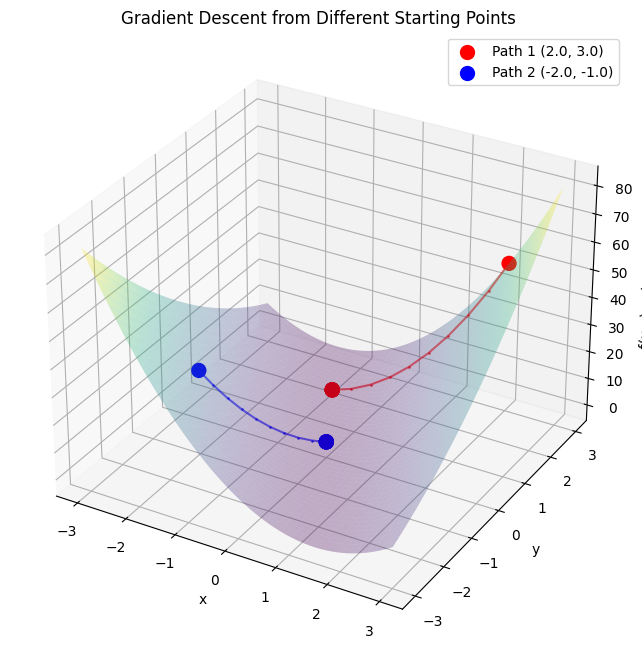


Final values:
Path 1: f(x,y) = 0.00000000
Path 2: f(x,y) = 0.00000000


In [101]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def optimize_path(start_x, start_y, learning_rate=0.1, n_steps=20):
    """Run optimization from a given starting point and return the path"""
    x = torch.tensor(start_x, requires_grad=True)
    y = torch.tensor(start_y, requires_grad=True)
    
    path_x = []
    path_y = []
    path_z = []
    
    for step in range(n_steps):
        current_x = x.item()
        current_y = y.item()
        current_z = (2*current_x + current_y)**2
        
        path_x.append(current_x)
        path_y.append(current_y)
        path_z.append(current_z)
        
        z = x + y
        w = z + x
        f = w ** 2
        f.backward()
        
        with torch.no_grad():
            x -= learning_rate * x.grad
            y -= learning_rate * y.grad
            x.grad.zero_()
            y.grad.zero_()
    
    # Add final point
    path_x.append(x.item())
    path_y.append(y.item())
    path_z.append((2*x.item() + y.item())**2)
    
    return path_x, path_y, path_z

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create surface data
grid_size = 50
x_range = np.linspace(-3, 3, grid_size)
y_range = np.linspace(-3, 3, grid_size)
X, Y = np.meshgrid(x_range, y_range)
Z = (2*X + Y)**2

# Get two optimization paths
path1_x, path1_y, path1_z = optimize_path(2.0, 3.0)    # First starting point
path2_x, path2_y, path2_z = optimize_path(-2.0, -1.0)  # Second starting point

# Plot surface
surface = ax.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis')

# Plot first path with intermediate points (red)
for i in range(len(path1_x)-1):
    interp_points = 10
    xs = np.linspace(path1_x[i], path1_x[i+1], interp_points)
    ys = np.linspace(path1_y[i], path1_y[i+1], interp_points)
    zs = (2*xs + ys)**2  # Calculate z-values on the surface
    
    ax.plot(xs, ys, zs, 'r.-', alpha=0.6, markersize=2)

# Plot second path with intermediate points (blue)
for i in range(len(path2_x)-1):
    interp_points = 10
    xs = np.linspace(path2_x[i], path2_x[i+1], interp_points)
    ys = np.linspace(path2_y[i], path2_y[i+1], interp_points)
    zs = (2*xs + ys)**2  # Calculate z-values on the surface
    
    ax.plot(xs, ys, zs, 'b.-', alpha=0.6, markersize=2)

# Plot actual optimization steps as larger points
ax.scatter(path1_x, path1_y, path1_z, 
          c='red',
          s=100, 
          zorder=10,
          label='Path 1 (2.0, 3.0)')

ax.scatter(path2_x, path2_y, path2_z, 
          c='blue',
          s=100, 
          zorder=10,
          label='Path 2 (-2.0, -1.0)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y) = (2x + y)²')
ax.set_title('Gradient Descent from Different Starting Points')
ax.legend()

plt.show()

# Print final values for each path
print("\nFinal values:")
print(f"Path 1: f(x,y) = {path1_z[-1]:.8f}")
print(f"Path 2: f(x,y) = {path2_z[-1]:.8f}")